## Regression overview

Regression analyses what factors have an impact on an outcome. It allows us to test the accuracy of an estimate for a numerical output from a series of inputs and reveals the relationship between the two. 

## Brief

Create a model to predict the happiness level (dependent variable) of a country based on alcohol (beer) consumption (independent variable)

## Import libraries

In [259]:
# prodives data structure and data analysis tools
import pandas as pd
# plotting tool
import matplotlib.pyplot as plt
# scientific calculations
import numpy as np
# modules for loading datasets and creating linear models
from sklearn import datasets, linear_model
# module to split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# statistical data visualisation
import seaborn as sns
# functions for the estimation of many different statistical models
import statsmodels.api as sm

## Import data

In [260]:
ds = pd.read_csv("HappinessAlcoholConsumption.csv")
ds.head(6)

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97
5,Canada,North America,north,7.404,922,42.349,240,122,100


In [261]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
Country             122 non-null object
Region              122 non-null object
Hemisphere          122 non-null object
HappinessScore      122 non-null float64
HDI                 122 non-null int64
GDP_PerCapita       122 non-null float64
Beer_PerCapita      122 non-null int64
Spirit_PerCapita    122 non-null int64
Wine_PerCapita      122 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 8.7+ KB


Columns
- Country - Name of the country
- Region - Region the country belongs to
- Hemisphere - Hemisphere of country
- HappinessScore - A metric measured in 2016 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest"
- HDI - Human Development Index by United Nations Development Programme
- GDP_PerCapitaGross -  Domestic Product index
- Beer_PerCapita - Liters ( per capita ) of beer consumption
- Spirit_PerCapita - Consumption of spirits drink ( per capita )
- Wine_PerCapita - Wine consumption

## Explore and transform

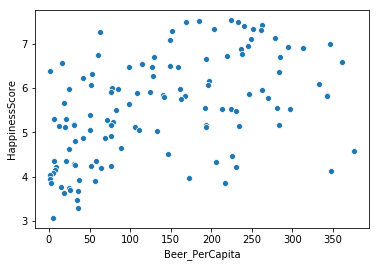

In [262]:
sns.scatterplot(x='Beer_PerCapita', y='HappinessScore', data=ds)

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


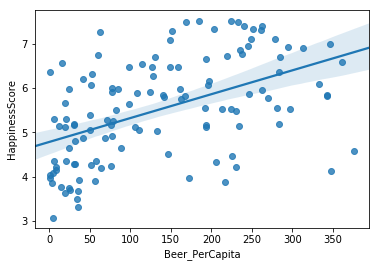

In [263]:
sns.regplot(x='Beer_PerCapita', y='HappinessScore', data=ds)

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


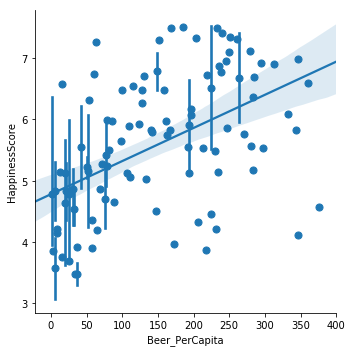

In [264]:
sns.lmplot(x='Beer_PerCapita', y='HappinessScore', data=ds, x_estimator=np.mean)

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


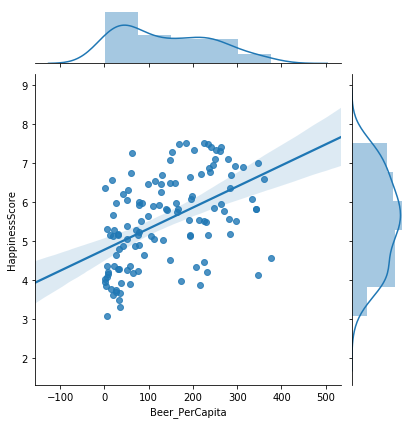

In [265]:
sns.jointplot(x='Beer_PerCapita', y='HappinessScore', data=ds, kind="reg")

## Build model

In [266]:
# Testing correlation between the two 
ds['Beer_PerCapita'].corr(ds['HappinessScore'])

0.49336720477895335

In [267]:
ds.corr()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
HappinessScore,1.000000,0.815163,-0.451425,0.493367,0.256399,0.450589
HDI,0.815163,1.000000,-0.573734,0.588394,0.393413,0.602561
GDP_PerCapita,-0.451425,-0.573734,1.000000,-0.369936,-0.260818,-0.200154
Beer_PerCapita,0.493367,0.588394,-0.369936,1.000000,0.364855,0.474274
Spirit_PerCapita,0.256399,0.393413,-0.260818,0.364855,1.000000,0.118718
Wine_PerCapita,0.450589,0.602561,-0.200154,0.474274,0.118718,1.000000


In [268]:
x = ds[['Beer_PerCapita']]
y = ds[['HappinessScore']]

In [269]:
#Splitting the data in to test and train using sk learn train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 123)

In [270]:
x_train.head()

,Beer_PerCapita
65,230
23,285
9,152
91,147
79,194


In [271]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(91, 1) (91, 1)
(31, 1) (31, 1)


C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


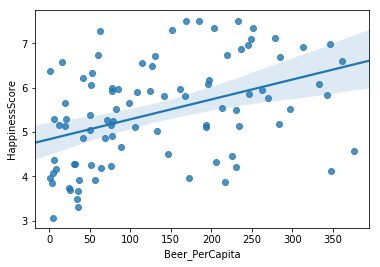

In [272]:
# Plotting a linear regression line against the train data 
Train = pd.concat([x_train, y_train], axis=1)
sns.regplot(x='Beer_PerCapita', y='HappinessScore', data=Train)


In [273]:
model = linear_model.LinearRegression(normalize = True)

In [274]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [275]:
#The R sqaured
print('The R Squared is:',model.score(x_train, y_train))

The R Squared is: 0.17086397872744372


In [276]:
# The coefficients
print('Coefficients: \n ', model.coef_)

Coefficients: 
  [[0.00448793]]


In [277]:
# The intercept
print('Intercept: \n ', model.intercept_)

Intercept: 
  [4.83636699]


In [278]:
# Predict the happiness score based on the beer consumption
y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred)

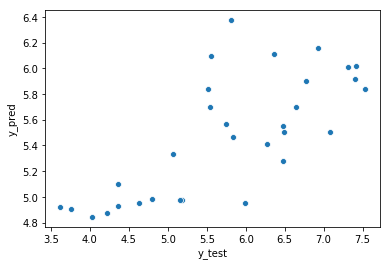

In [279]:
y_test = y_test['HappinessScore'].reset_index()
y_obs_pred = pd.concat([y_test['HappinessScore'], y_pred], axis=1)
y_obs_pred.columns= ['y_test', 'y_pred']
y_obs_pred['diff']= y_obs_pred['y_test'] - y_obs_pred['y_pred']
r= sns.scatterplot(x='y_test', y='y_pred', data=y_obs_pred)

In [280]:
diff = y_obs_pred['y_pred']-y_obs_pred['y_test']
diff_sq = diff**2
mean_diff_sq = diff_sq.mean()
RMSE = np.sqrt(mean_diff_sq)
RMSE

0.8934510872196844

In [281]:
regression_model = smf.ols('HappinessScore ~ Beer_PerCapita', data= Train).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:         HappinessScore   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     18.34
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           4.65e-05
Time:                        15:48:32   Log-Likelihood:                -132.40
No. Observations:                  91   AIC:                             268.8
Df Residuals:                      89   BIC:                             273.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.8364      0.180     26.

## Multivariate linear model

In [282]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
Country             122 non-null object
Region              122 non-null object
Hemisphere          122 non-null object
HappinessScore      122 non-null float64
HDI                 122 non-null int64
GDP_PerCapita       122 non-null float64
Beer_PerCapita      122 non-null int64
Spirit_PerCapita    122 non-null int64
Wine_PerCapita      122 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 8.7+ KB


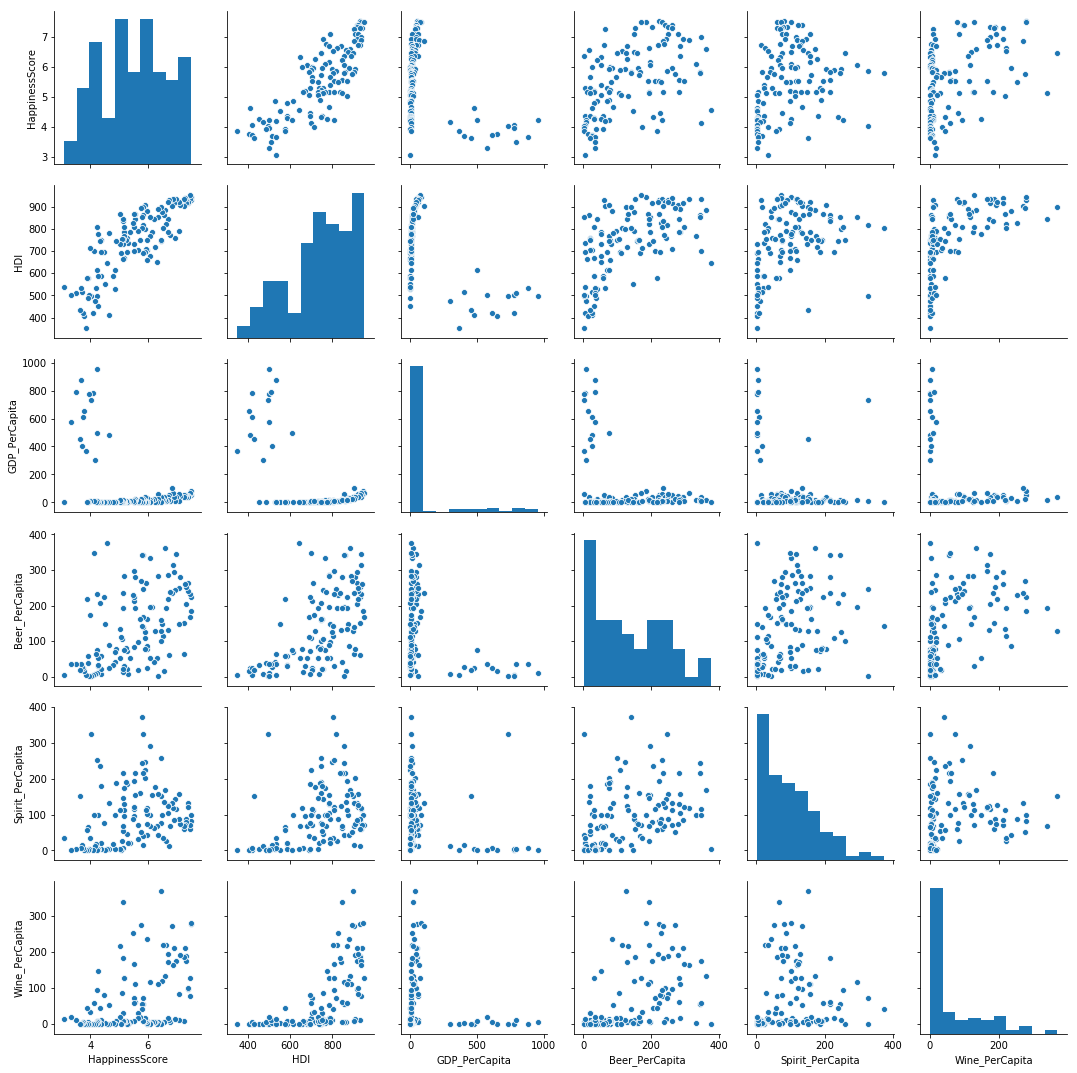

In [283]:
sns.pairplot(ds)

In [284]:
ds.corr()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
HappinessScore,1.000000,0.815163,-0.451425,0.493367,0.256399,0.450589
HDI,0.815163,1.000000,-0.573734,0.588394,0.393413,0.602561
GDP_PerCapita,-0.451425,-0.573734,1.000000,-0.369936,-0.260818,-0.200154
Beer_PerCapita,0.493367,0.588394,-0.369936,1.000000,0.364855,0.474274
Spirit_PerCapita,0.256399,0.393413,-0.260818,0.364855,1.000000,0.118718
Wine_PerCapita,0.450589,0.602561,-0.200154,0.474274,0.118718,1.000000


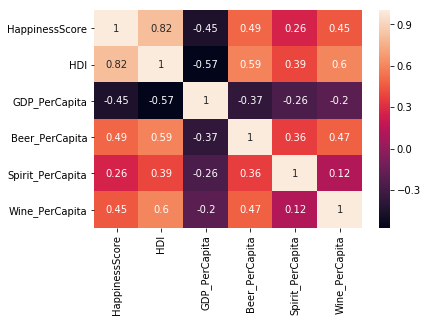

In [285]:
sns.heatmap(ds.corr(), annot=True)

In [286]:
ds.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


In [287]:
x = ds.drop(["HappinessScore", "Country", "Region", "Hemisphere"], axis=1)
x = sm.add_constant(x) # shows where the linear regression line begins on the Y axis
y = ds[["HappinessScore"]]

In [288]:
x.head()

,const,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,1.0,928,53.579,224,81,278
1,1.0,943,79.866,185,100,280
2,1.0,933,60.530,233,61,78
3,1.0,951,70.890,169,71,129
4,1.0,918,43.433,263,133,97


### Train Multivariate linear model

In [289]:
#Splitting the data in to test and train using sk learn train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 123)

In [290]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(91, 6) (91, 1)
(31, 6) (31, 1)


In [304]:
model = linear_model.LinearRegression(normalize = True)
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

### Checking multivariate model performance

In [299]:
#The R sqaured
print('The R Squared is:',model.score(x_train, y_train))
# The coefficients
print('Coefficients is:', model.coef_)
# The intercept
print('Intercept: \n ', model.intercept_)

The R Squared is: 0.686674742999301
Coefficients is: [[ 0.00000000e+00  7.31675343e-03  8.85459266e-05  5.00997412e-04
  -1.51828496e-03 -1.68096655e-03]]
Intercept: 
  [0.21626397]


In [300]:
model = sm.OLS(y_train, x_train)
model_results = model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     37.26
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           4.78e-20
Time:                        15:56:15   Log-Likelihood:                -88.124
No. Observations:                  91   AIC:                             188.2
Df Residuals:                      85   BIC:                             203.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2163      0.506      0.427      0.670      -0.790       1.223
HDI                  0.0073      0.001      9.801      0.000       0.006       0.009
GDP_PerCapita     8.855e-05      0.000      0.206      0.837      -0.001       0.001
Beer_PerCapita       0.0005      0.001      0.611      0.543      -0.001       0.002
Spirit_PerCapita    -0.0015      0.001     -1.472      0.145      -0.004       0.001
Wine_PerCapita      -0.0017      0.001     -1.664      0.100      -0.004       0.000
==============================================================================
Omnibus:                        1.813   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.456
Skew:                          -0.129   Prob(JB):                        0.483
Kurtosis:                       2.437   Cond. No.                     5.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Const coef - shows where the regression line strts on the x axis. <br>
- All other coef - shows the gradient of the line <br>
- P>[t] - anything less than 0.05 is statistically significant

### Evaluate model accuracy

In [301]:
y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred)

ValueError: shapes (91,6) and (31,6) not aligned: 6 (dim 1) != 31 (dim 0)

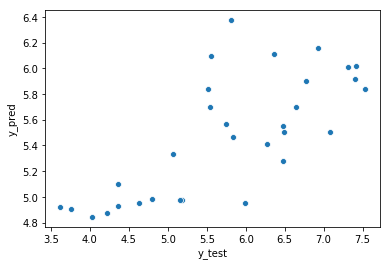

In [302]:
y_test = y_test['HappinessScore'].reset_index()
y_obs_pred = pd.concat([y_test['HappinessScore'], y_pred], axis=1)
y_obs_pred.columns= ['y_test', 'y_pred']
y_obs_pred['diff']= y_obs_pred['y_test'] - y_obs_pred['y_pred']
r= sns.scatterplot(x='y_test', y='y_pred', data=y_obs_pred)

In [303]:
diff = y_obs_pred['y_pred']-y_obs_pred['y_test']
diff_sq = diff**2
mean_diff_sq = diff_sq.mean()
MSE = np.sqrt(mean_diff_sq)
RMSE

0.8934510872196844